In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# loading data
life_data_path = "Life Expectancy Data.csv"
life_df = pd.read_csv(life_data_path)

In [3]:
# data cleaning
clean_ld = life_df.dropna()

In [47]:
# Summary of potential Life expctancy factors by nation
potential_le_factors = ['Status','infant deaths', 'Life expectancy ', 
                        'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', 
                        ' BMI ','Polio', 'Total expenditure','Diphtheria ', 
                        ' HIV/AIDS', 'GDP', 'Population',' thinness  1-19 years', 
                        ' thinness 5-9 years','Schooling']

inital_summary = clean_ld.groupby("Country")[potential_le_factors].agg("max")
nation_statuses =clean_ld[["Country","Status"]].drop_duplicates()
summary_by_nation = pd.merge(inital_summary, nation_statuses , on=["Country"])

,Country,Status_x,infant deaths,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling,Status_y
0,Afghanistan,Developing,88,65.0,0.03,79.679367,68.0,8762,19.1,68.0,9.42,68.0,0.1,669.959000,33736494.0,19.9,19.9,10.1,Developing
1,Albania,Developing,1,77.8,5.79,437.062100,99.0,662,58.0,99.0,6.38,99.0,0.1,4575.763787,2992547.0,2.1,2.2,14.2,Developing
2,Algeria,Developing,21,75.4,0.66,555.926083,95.0,3289,58.4,95.0,7.21,95.0,0.1,5564.825660,39113313.0,6.2,6.1,14.4,Developing
3,Angola,Developing,87,56.0,8.33,256.122524,77.0,11699,22.7,81.0,4.37,77.0,2.6,4598.249988,24218565.0,9.6,9.6,11.4,Developing
4,Argentina,Developing,12,76.2,8.41,1504.329462,94.0,17,62.2,99.0,8.31,98.0,0.1,12976.636420,42981515.0,1.2,1.0,17.3,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uruguay,Developing,1,77.0,6.76,2331.532804,96.0,0,63.4,96.0,11.59,96.0,0.1,16881.256800,3419546.0,1.8,1.7,15.7,Developing
129,Uzbekistan,Developing,27,69.2,2.83,140.690528,99.0,863,43.9,99.0,6.49,99.0,0.4,1564.966945,2648825.0,3.3,3.3,12.1,Developing
130,Vanuatu,Developing,0,78.0,1.24,564.816704,68.0,165,52.5,67.0,5.20,71.0,0.1,3275.916840,253142.0,1.7,1.7,10.8,Developing
131,Zambia,Developing,34,63.0,2.59,196.915250,94.0,15754,22.8,93.0,7.56,94.0,17.0,1738.882200,14699937.0,7.1,7.0,12.5,Developing


In [48]:
# Charting LE Results
def chart_life_expectancy_scatter(factor):
    summary_by_nation.plot(x=factor,y='Life expectancy ',kind="scatter")


In [50]:
def chart_life_expectancy_lr(factor):
    x_values = summary_by_nation[factor]
    y_values = summary_by_nation["Life expectancy "]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    #Line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # # Label plot and annotate the line equation
    plt.xlabel(factor)
    plt.ylabel("Life expectancy ")
    # plt.annotate(line_eq,(2,-30),fontsize=15,color="red")

    # Print r value
    
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()
    # print(rvalue)
    # rvalue

The r-value is: 0.001223457192887886


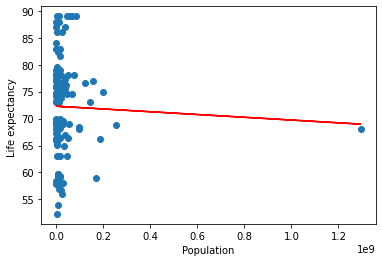

In [52]:
# chart_life_expectancy_scatter("GDP")
chart_life_expectancy_lr(potential_le_factors[13])
# summary_by_nation["Population"]
# short_summ = summary_by_nation[["Country", "Population"]]
# short_summ.sort_values(inplace=True, by=["Population"])
# short_summ.to_csv("lovemelots.csv")

# india = short_summ[short_summ["Country"] == "India"]
# india
